<h1>Comments on Notebook</h1>
<p>While the experimentation on this notebook is gerat for learning, the outcomes are not in the direction
you need for the rest of the project. Please revisit this only in case we you want to move on with the masking
and please stop copy pasting cells. Do not be lazy!</p>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Normalize the pixel values
    normalized_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image

In [14]:
def generate_heatmap(image):
    # Compute the gradients
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # Normalize the gradient magnitude to create a heatmap
    heatmap = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    heatmap = heatmap.astype(np.uint8)
    return heatmap

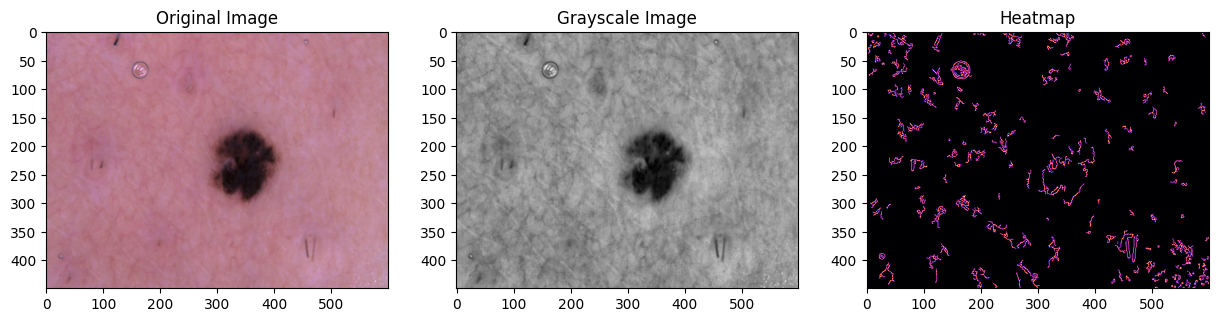

In [29]:
# Path to the image (replace with the actual file path)
image_path = './control_2.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Generate the heatmap
heatmap = generate_heatmap(preprocessed_image)

# Display the original image, grayscale image, and heatmap
original_image = cv2.imread(image_path)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(preprocessed_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Heatmap')
plt.imshow(heatmap, cmap='magma')

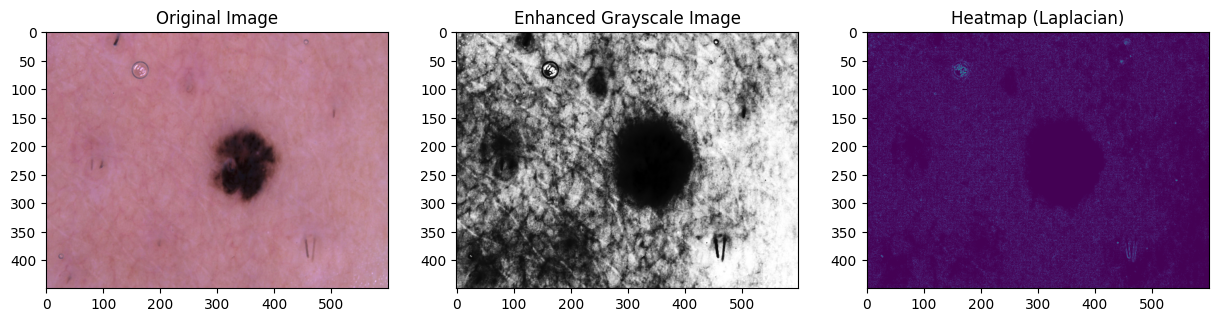

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Histogram equalization to improve contrast
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image

# Function to generate a heatmap based on pixel intensity differences
def generate_heatmap(image):
    # Compute the gradients using the Laplacian operator
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    gradient_magnitude = np.absolute(laplacian)
    
    # Normalize the gradient magnitude to create a heatmap
    heatmap = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
    heatmap = heatmap.astype(np.uint8)
    return heatmap

# Path to the image 
image_path = './control_2.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Generate the heatmap
heatmap = generate_heatmap(preprocessed_image)

# Display the original image, grayscale image, and heatmap
original_image = cv2.imread(image_path)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Enhanced Grayscale Image')
plt.imshow(preprocessed_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Heatmap (Laplacian)')
plt.imshow(heatmap, cmap='viridis')

plt.show()


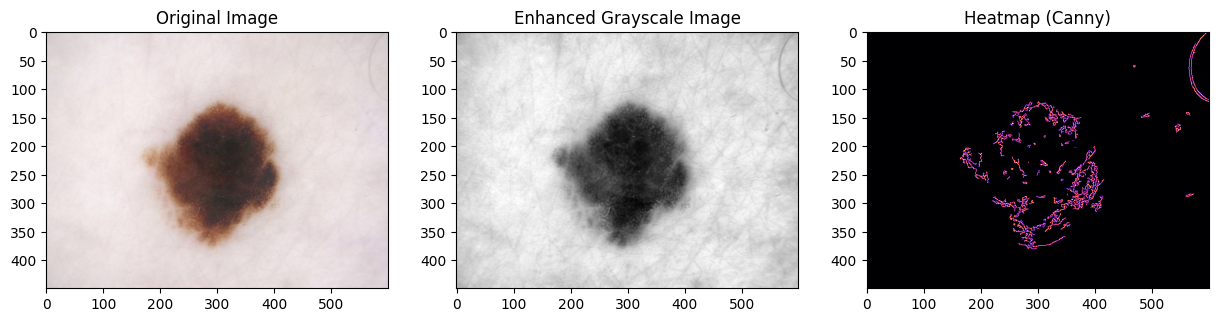

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to generate a heatmap based on pixel intensity differences using Canny edge detector
def generate_heatmap(image):
    # Use Canny edge detector
    edges = cv2.Canny(image, threshold1=50, threshold2=150)
    
    # Normalize the edges to create a heatmap
    heatmap = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)
    heatmap = heatmap.astype(np.uint8)
    return heatmap

# Path to the image (can I automate this??? once and for all??)
image_path = './control_3.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Generate the heatmap
heatmap = generate_heatmap(preprocessed_image)

# Display the original image, grayscale image, and heatmap
original_image = cv2.imread(image_path)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Enhanced Grayscale Image')
plt.imshow(preprocessed_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Heatmap (Canny)')
plt.imshow(heatmap, cmap='magma')

plt.show()


#Note: find a way to refactor some of the typical operations into a class and have that as
#utility class that you can call on all experiments and stop copy pasting to new cells!!

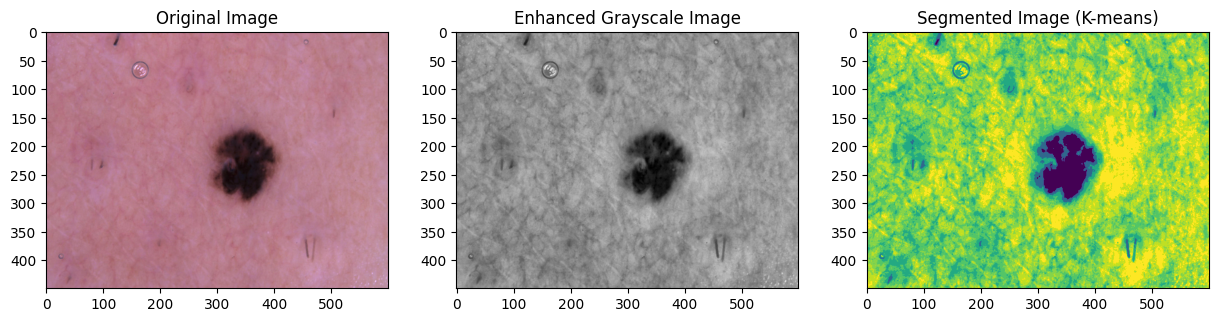

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=3):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to 8 bit values
    centers = np.uint8(centers)
    labels = labels.flatten()

    # Map the labels to the center values
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Path to the image 
image_path = './control_2.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Apply K-means clustering
segmented_image = apply_kmeans(preprocessed_image, k=7)

# Display the original image, enhanced grayscale image, and segmented image
original_image = cv2.imread(image_path)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Enhanced Grayscale Image')
plt.imshow(preprocessed_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Segmented Image (K-means)')
plt.imshow(segmented_image, cmap='viridis')

plt.show()


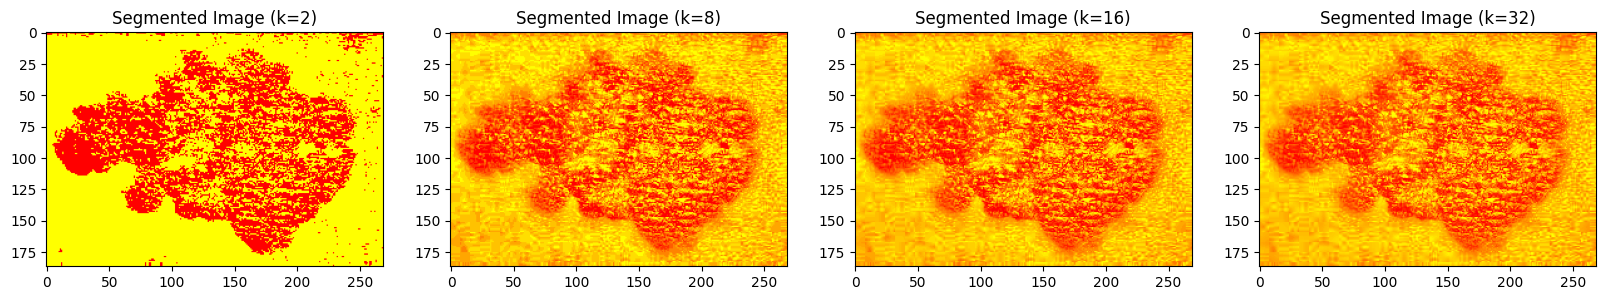

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=3):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to 8 bit values
    centers = np.uint8(centers)
    labels = labels.flatten()

    # Map the labels to the center values
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Path to the image 
image_path = './control_1.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Adjust the value of k to control sensitivity
k_values = [2, 8, 16, 32]

# Plot the results for different values of k
plt.figure(figsize=(20, 10))

for i, k in enumerate(k_values):
    # Apply K-means clustering
    segmented_image = apply_kmeans(preprocessed_image, k=k)
    
    plt.subplot(1, len(k_values), i + 1)
    plt.title(f'Segmented Image (k={k})')
    plt.imshow(segmented_image, cmap='autumn')

plt.show()


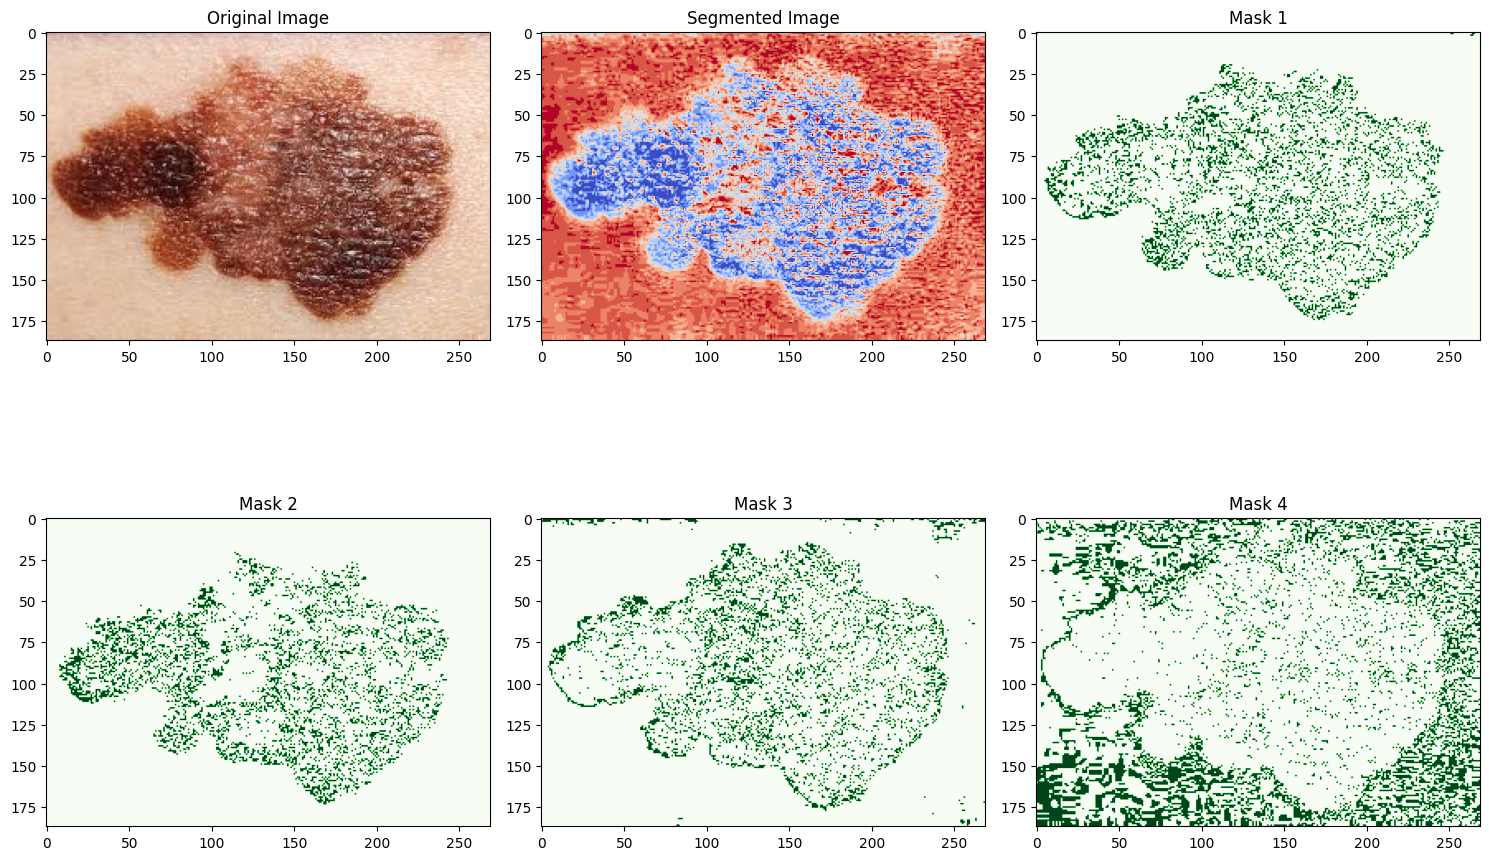

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=8):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to 8-bit values
    centers = np.uint8(centers)
    labels = labels.flatten()

    # Map the labels to the center values
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image, labels, centers

# Function to generate binary masks for each cluster
def generate_masks(labels, image_shape, k):
    masks = []
    for i in range(k):
        mask = np.where(labels == i, 255, 0).astype(np.uint8)
        mask = mask.reshape(image_shape)
        masks.append(mask)
    return masks

# Path to the image 
image_path = './control_1.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Apply K-means clustering
segmented_image, labels, centers = apply_kmeans(preprocessed_image, k=8)

# Generate binary masks for each cluster
masks = generate_masks(labels, preprocessed_image.shape, k=4)

# Determine the number of rows and columns for subplots
num_masks = len(masks)
num_cols = 3
num_rows = (num_masks + 2) // num_cols + 1  # Adjusting the number of rows to fit all subplots

# Display the original image, segmented image, and masks
original_image = cv2.imread(image_path)
plt.figure(figsize=(15, 5 * num_rows))

plt.subplot(num_rows, num_cols, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

plt.subplot(num_rows, num_cols, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='coolwarm')

# Adjust start index for masks
start_index = 3

for i, mask in enumerate(masks):
    plt.subplot(num_rows, num_cols, start_index + i)
    plt.title(f'Mask {i+1}')
    plt.imshow(mask, cmap='Greens')

plt.tight_layout()
plt.show()

# Delete this list after you have chose a final cmap you want to use :/

# types of cmaps: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 
# 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
# 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
# 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
# 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
#'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 
# 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
# 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 
# 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 
# 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
# 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
# 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
# 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
# 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 
# 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
# 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 
 #'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 
 #'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 
# 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
# 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
# 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 
# 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
# 'viridis', 'viridis_r', 'winter', 'winter_r'

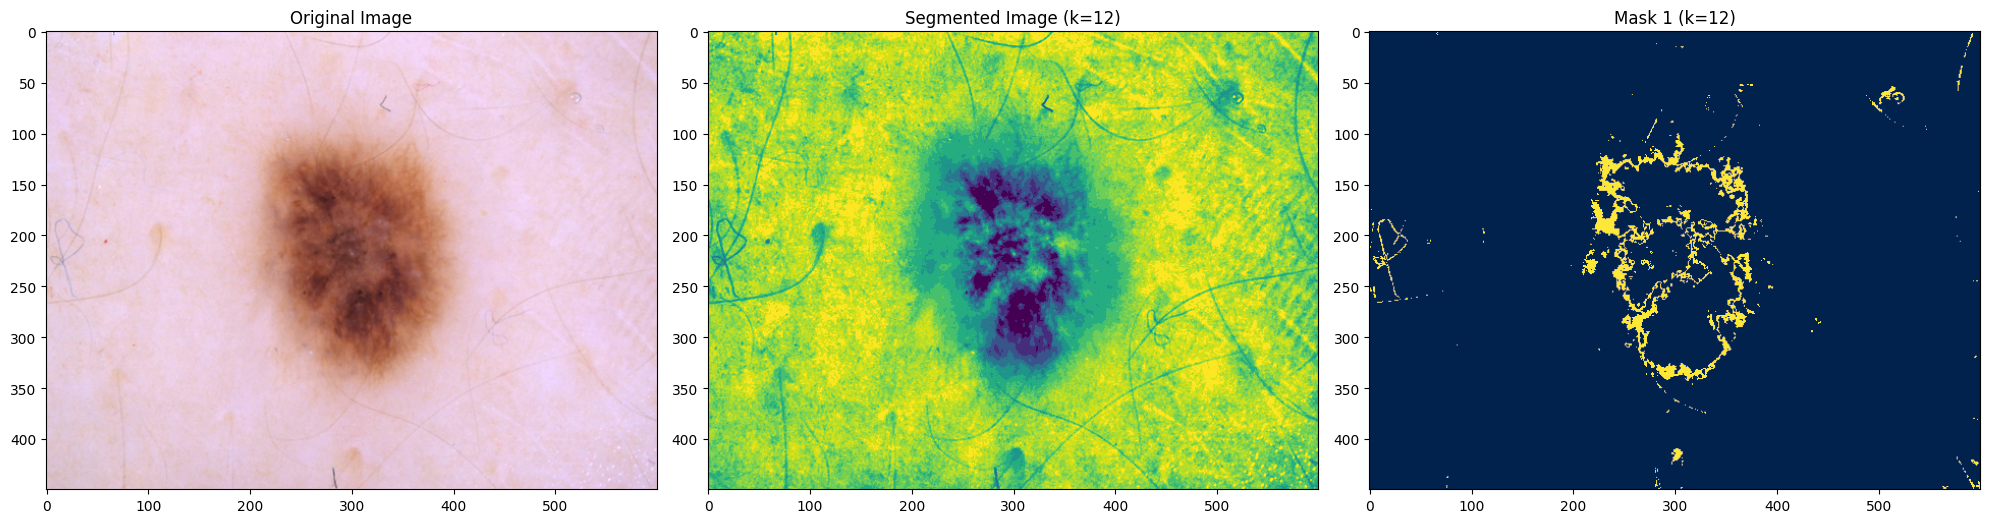

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=3):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to 8-bit values
    centers = np.uint8(centers)
    labels = labels.flatten()

    # Map the labels to the center values
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image, labels, centers

# Function to generate binary masks for each cluster
def generate_masks(labels, image_shape, k):
    masks = []
    for i in range(k):
        mask = np.where(labels == i, 255, 0).astype(np.uint8)
        mask = mask.reshape(image_shape)
        masks.append(mask)
    return masks

# Path to the image 
image_path = './control_6.jpeg'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Adjust the value of k to control sensitivity
k_values = [12]

# Determine the number of rows and columns for subplots
num_cols = 3  # One column for the original image and three columns for the segmented image and masks
num_rows = len(k_values)  # One row for each k value

plt.figure(figsize=(20, 5 * num_rows))

# Display the original image
original_image = cv2.imread(image_path)
plt.subplot(num_rows, num_cols, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

for i, k in enumerate(k_values):
    # Apply K-means clustering
    segmented_image, labels, centers = apply_kmeans(preprocessed_image, k=k)

    # Generate binary masks for each cluster
    masks = generate_masks(labels, preprocessed_image.shape, k)

    # Display the segmented image
    plt.subplot(num_rows, num_cols, i * num_cols + 2)
    plt.title(f'Segmented Image (k={k})')
    plt.imshow(segmented_image, cmap='viridis')

    # Display masks
    for j, mask in enumerate(masks):
        if j >= num_cols - 2:
            break  # Ensure we do not exceed the column limit
        plt.subplot(num_rows, num_cols, i * num_cols + 3 + j)
        plt.title(f'Mask {j+1} (k={k})')
        plt.imshow(mask, cmap='cividis')

plt.tight_layout()
plt.show()


In [31]:
#This code is ready for the first prototype test (or is it!!) :P

import cv2
import numpy as np
import os

# Function to preprocess the image and apply K-means clustering
def preprocess_and_segment(image_path, k=3):
    # Read the image and convert to grayscale
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)

    # Reshape image for K-means
    pixel_values = equalized_image.reshape((-1, 1)).astype(np.float32)
    
    # Apply K-means clustering
    _, labels, centers = cv2.kmeans(pixel_values, k, None, 
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(equalized_image.shape)
    
    return segmented_image

# Path to the image
image_path = './control_4.jpeg'

# Preprocess and segment the image
segmented_image = preprocess_and_segment(image_path, k=7)

# Save the segmented image
output_folder = './segmented_images'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'segmented_image.png')
cv2.imwrite(output_path, segmented_image)


True

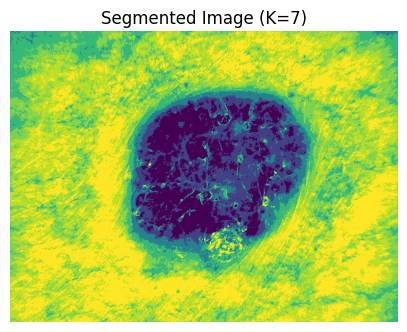

In [32]:

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to preprocess the image and apply K-means clustering
def preprocess_and_segment(image_path, k=3):
    # Read the image and convert to grayscale
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Adaptive Histogram Equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)

    # Reshape image for K-means
    pixel_values = equalized_image.reshape((-1, 1)).astype(np.float32)
    
    # Apply K-means clustering
    _, labels, centers = cv2.kmeans(pixel_values, k, None, 
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2), 
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    segmented_image = centers[labels.flatten()].reshape(equalized_image.shape)
    
    return segmented_image

# Path to the image
image_path = './control_4.jpeg'

# Preprocess and segment the image with specified k value
k = 7  # You can change this value as needed
segmented_image = preprocess_and_segment(image_path, k=k)

# Save the segmented image with specified colormap
output_folder = './segmented_images'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, f'segmented_image_k{k}.png')

# Normalize the segmented image for better visualization
segmented_image_normalized = cv2.normalize(segmented_image, None, 0, 255, cv2.NORM_MINMAX)
segmented_image_normalized = segmented_image_normalized.astype(np.uint8)

# Apply colormap
cmap = plt.get_cmap('viridis')  # You can change the colormap here
segmented_image_colored = cmap(segmented_image_normalized)

# Save the image
plt.imsave(output_path, segmented_image_colored)

# Display the segmented image
plt.figure(figsize=(5, 5))
plt.title(f'Segmented Image (K={k})')
plt.imshow(segmented_image_colored)
plt.axis('off')
plt.show()


In [48]:
import cv2
import numpy as np
import os

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Adaptive Histogram Equalization to improve contrast
    clahe = cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8, 8))
    equalized_image = clahe.apply(gray_image)
    return equalized_image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=3):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.8)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    return labels, centers

# Function to generate the last binary mask
def generate_last_mask(labels, image_shape, k):
    last_mask = np.where(labels == (k - 1), 255, 0).astype(np.uint8)
    last_mask = last_mask.reshape(image_shape)
    return last_mask

# Function to save the mask
def save_mask(mask, output_folder, base_filename):
    os.makedirs(output_folder, exist_ok=True)
    mask_filename = os.path.join(output_folder, f'{base_filename}_last_mask.png')
    cv2.imwrite(mask_filename, mask)

# Path to the image and output folder
image_path = './control_2.jpeg'
output_folder = './masks'

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Apply K-means clustering
k = 3  # Adjust this value as needed
labels, centers = apply_kmeans(preprocessed_image, k=k)

# Generate the last binary mask
last_mask = generate_last_mask(labels, preprocessed_image.shape, k)

# Save the mask
base_filename = os.path.splitext(os.path.basename(image_path))[0]
save_mask(last_mask, output_folder, base_filename)


In [6]:
import cv2
import numpy as np
import os

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    return image

# Function to apply K-means clustering for image segmentation
def apply_kmeans(image, k=3):
    # Convert to LAB color space for better segmentation
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Reshape image for K-means
    pixel_values = lab_image.reshape((-1, 3)).astype(np.float32)
    
    # Apply K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    return labels, centers, lab_image.shape[:2]

# Function to generate the most probable mole mask based on color clustering
def generate_mole_mask(labels, centers, image_shape, k):
    # Assume the mole is the cluster with the darkest center
    darkest_cluster = np.argmin(np.sum(centers, axis=1))
    mole_mask = np.where(labels == darkest_cluster, 255, 0).astype(np.uint8)
    mole_mask = mole_mask.reshape(image_shape)
    return mole_mask

# Function to apply color-based thresholding
def color_threshold(image):
    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the color range for the mole
    lower_brown = np.array([0, 50, 50])
    upper_brown = np.array([20, 255, 255])
    
    # Create a mask based on the color range
    mask = cv2.inRange(hsv, lower_brown, upper_brown)
    
    return mask

# Function to combine masks
def combine_masks(kmeans_mask, color_mask):
    combined_mask = cv2.bitwise_and(kmeans_mask, color_mask)
    return combined_mask

# Function to save the mask
def save_mask(mask, output_folder, base_filename):
    os.makedirs(output_folder, exist_ok=True)
    mask_filename = os.path.join(output_folder, f'{base_filename}_mole_mask.png')
    cv2.imwrite(mask_filename, mask)

image_path = './control_1.jpeg'
output_folder = './masks'

# Preprocess the image
image = preprocess_image(image_path)

# Apply K-means clustering
k = 3  # Adjust this value as needed
labels, centers, image_shape = apply_kmeans(image, k=k)

# Generate the mole mask
kmeans_mask = generate_mole_mask(labels, centers, image_shape, k)

# Apply color-based thresholding
color_mask = color_threshold(image)

# Combine the K-means mask and color-based mask
final_mask = combine_masks(kmeans_mask, color_mask)

# Save the mask
base_filename = os.path.splitext(os.path.basename(image_path))[0]
save_mask(final_mask, output_folder, base_filename)
